#About Dataset
The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .
***Total no. of attributes:16
No .of instances:284***

######https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer?resource=download

##Attribute information:

* Gender: M(male), F(female) 
* Age: Age of the patient
* Smoking: YES=2 , NO=1.
* Yellow fingers: YES=2 , NO=1.
* Anxiety: YES=2 , NO=1.
* Peer_pressure: YES=2 , NO=1.
* Chronic Disease: YES=2 , NO=1.
* Fatigue: YES=2 , NO=1.
* Allergy: YES=2 , NO=1.
* Wheezing: YES=2 , NO=1.
* Alcohol: YES=2 , NO=1.
* Coughing: YES=2 , NO=1.
* Shortness of Breath: YES=2 , NO=1.
* Swallowing Difficulty: YES=2 , NO=1.
* Chest pain: YES=2 , NO=1.
* Lung Cancer: YES , NO.

#1 | Importing Libraries and Loading dataset


In [ ]:
#importing libraries used in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

## 1.1 Downloading and reading data


In [ ]:
#reading columns in the data and making sure there are no missing or empty variables
data = pd.read_csv('survey lung cancer.csv')
n, m = data.shape

print('\n--------------------------------\n')
print(f'\n\nThere are {n} observations and {m} variables. \n\n')
print('\n--------------------------------\n')
print("checking missing columns in the data")
print('\n--------------------------------\n')
print(data.isna().sum(), '\n\n')  
print('\n--------------------------------\n')
print("print variable description")
print('\n--------------------------------\n')
print(data.describe(include='all'))  # printing description of the data
print('\n--------------------------------\n')


--------------------------------



There are 309 observations and 16 variables. 



--------------------------------

checking missing columns in the data

--------------------------------

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64 



--------------------------------

print variable description

--------------------------------

       GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count     309  309.000000  309.000000      309.000000  309.000000   
unique      2         NaN         NaN             NaN         NaN   
top         M         NaN         NaN             NaN   

## 1.2 Orginazing Data

In [ ]:
#changing 'M' variables to 0 and 'F' variables to 1 to make it easier to use in experiments
encoding_map = {'GENDER': {'M': 0, 'F': 1},
                'LUNG_CANCER' : {'YES': 1, 'NO': 0}}
data.replace(encoding_map, inplace=True)

print(data)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        1               2        2              1   
1         0   74        2               1        1              1   
2         1   59        1               1        1              2   
3         0   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       0   70        2               1        1              1   
306       0   58        2               1        1              1   
307       0   67        2               1        2              1   
308       0   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

## 1.3 Average age of dataset

In [ ]:
#using statistics to calculate number of people and the average of age in the dataset
sum = 0
count = 0
for age in data['AGE']:
    sum += age
    count +=1
print("Number of people : ", count)
avg = sum/count
print("Average Age : ", avg)

Number of people :  309
Average Age :  62.67313915857605


# 2 | Data Visualization

## 2.1 Correlation and Heatmap

In [ ]:
#creating heatmap
data.corr().style.background_gradient(cmap = "magma")

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.021306,-0.036277,0.212959,0.152127,0.275564,0.204606,0.083560,-0.154251,-0.141207,-0.454268,-0.133303,0.064911,0.078161,-0.362958,-0.067254
AGE,-0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,-0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,-0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,-0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


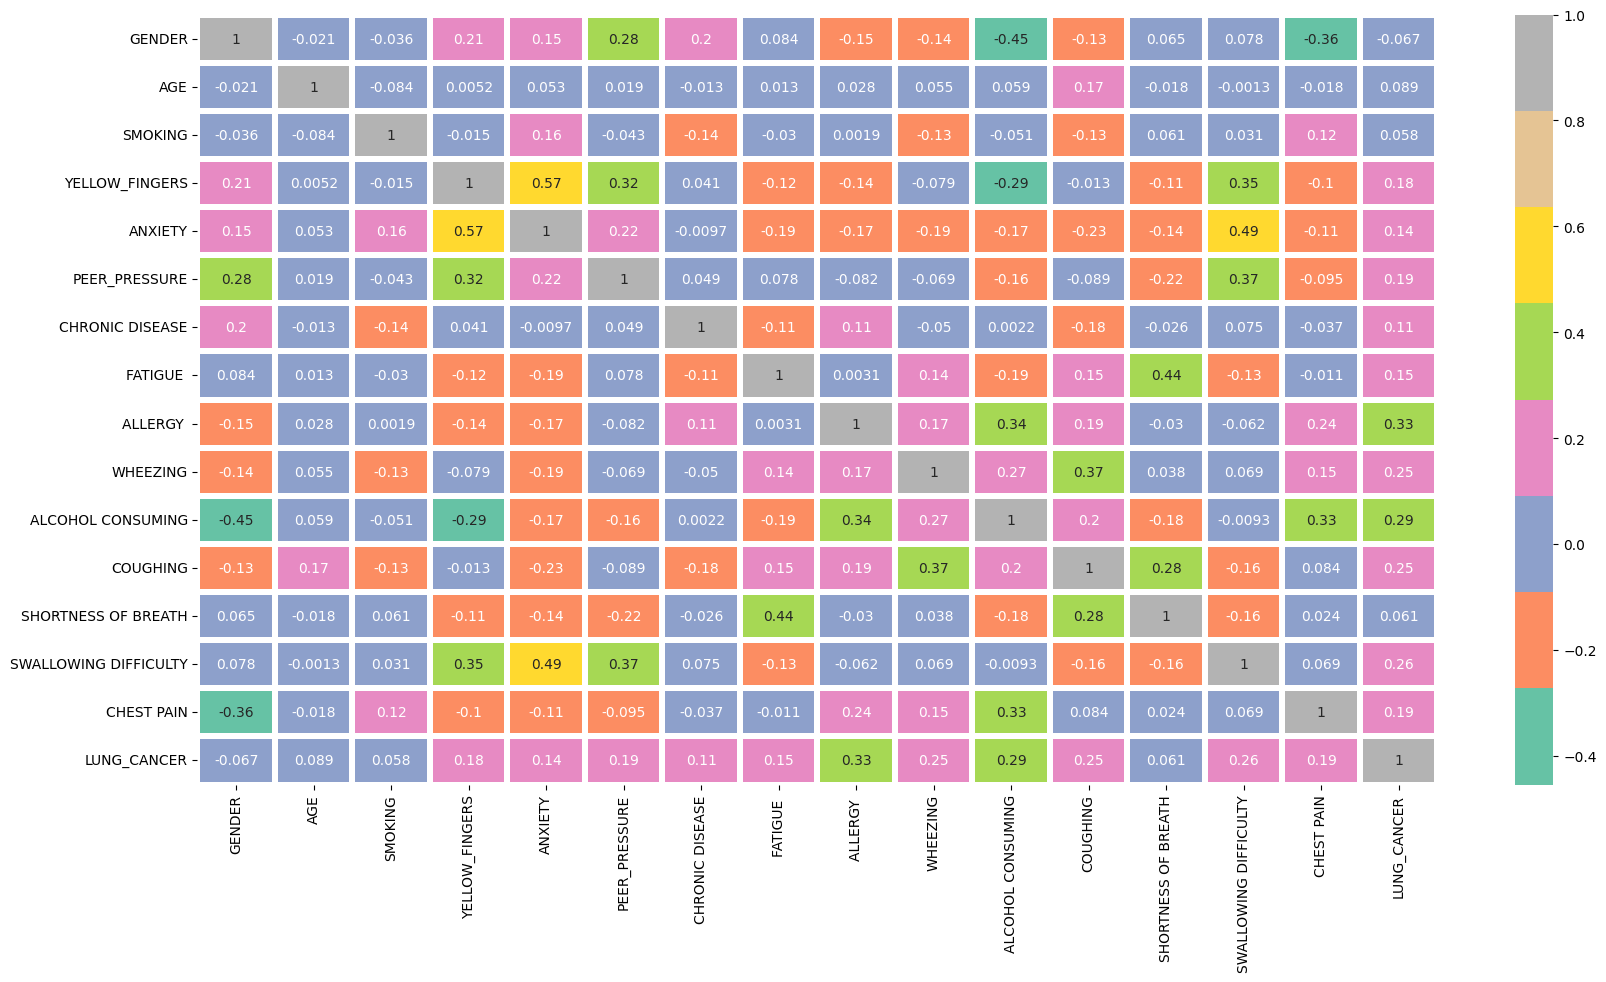

In [ ]:
#creating more detailed heat map with a scale of different colors to represent the values in the dataset
plt.figure(figsize = [20, 10], clear = True, facecolor = "white")
sns.heatmap(data.corr(), annot = True, square = False, linewidths = 3,
            linecolor = "white", cmap = "Set2");

## 2.2 Pie Chart

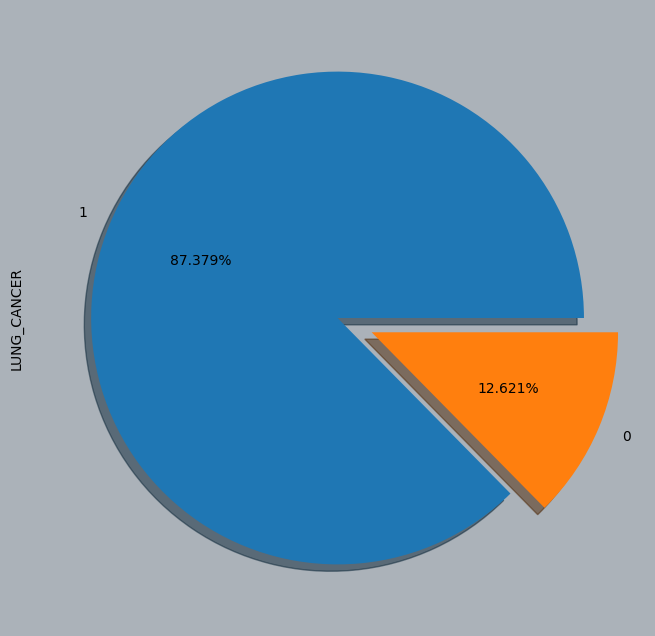

In [ ]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
data["LUNG_CANCER"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True);
#pie chart that shows 87.48% of the people have cancer according to the dataset, and 12.621 doesnt

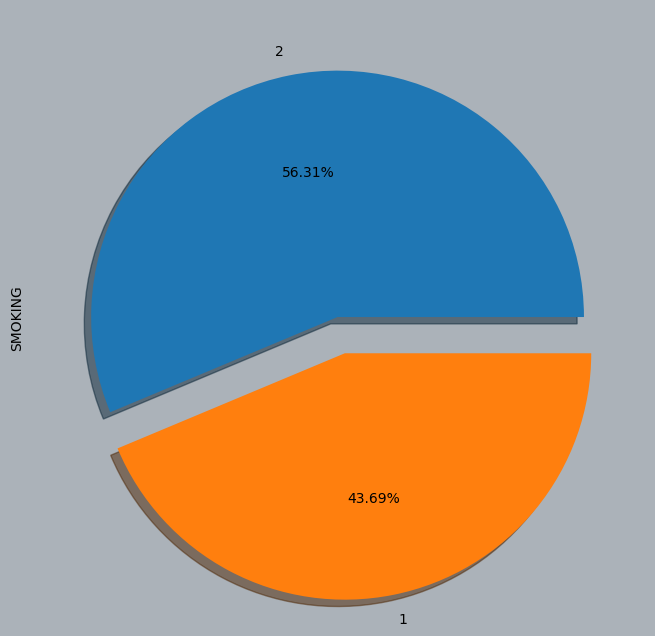

In [ ]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
data["SMOKING"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.2f%%', shadow = True);
#a plot pie that shows percentage of smoking people in the dataset. 56.31% of the people smoke. 

## 2.3 Barplot


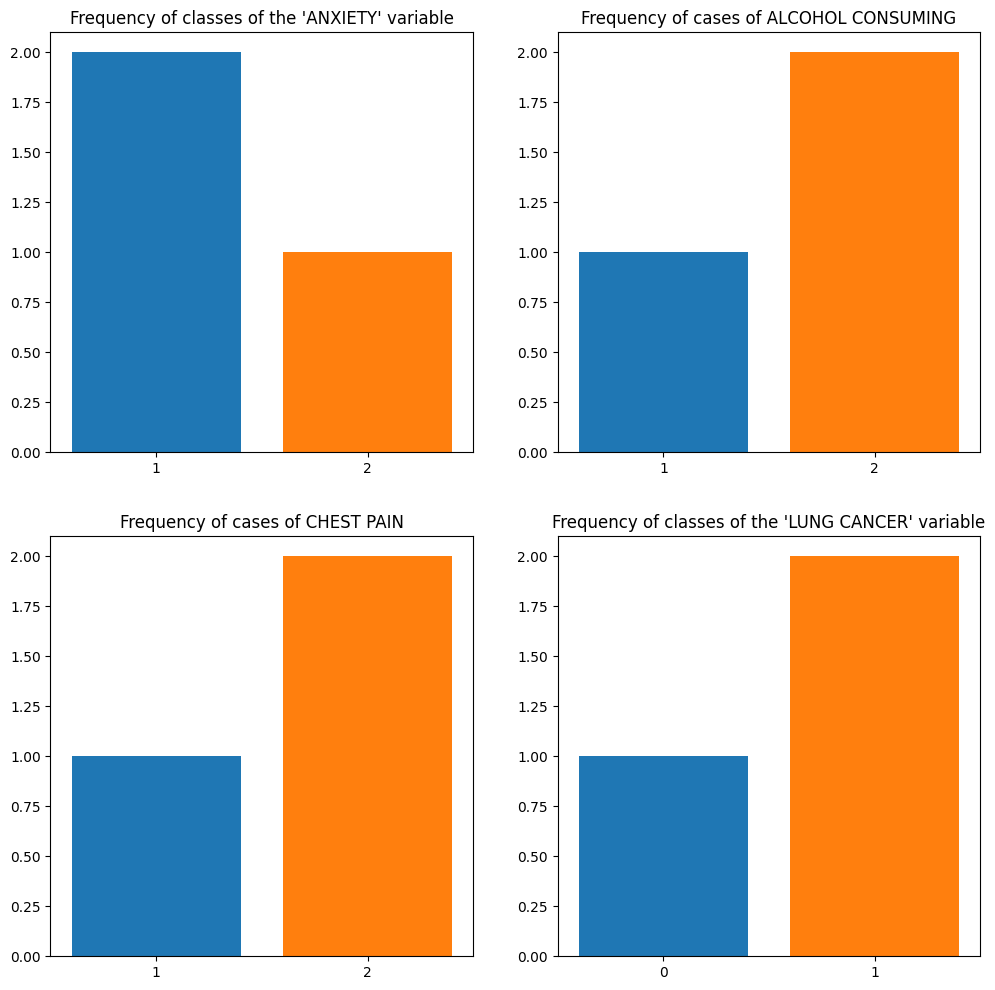

In [ ]:
#using barplot to visualize the data according to frequency of every case 
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = data["ANXIETY"].value_counts().index,
            y = data["SMOKING"].value_counts().index,
            data = data, saturation = 1).set(title = "Frequency of classes of the 'ANXIETY' variable");

sns.barplot(ax = axes[1],
            x = data["ALCOHOL CONSUMING"].value_counts().index,
            y = data["SMOKING"].value_counts().index,
            data = data, saturation = 1).set(title = "Frequency of cases of ALCOHOL CONSUMING");

sns.barplot(ax = axes[2],
            x = data["CHEST PAIN"].value_counts().index,
            y = data["SMOKING"].value_counts().index,
            data = data, saturation = 1).set(title = "Frequency of cases of CHEST PAIN");

sns.barplot(ax = axes[3],
            x = data["LUNG_CANCER"].value_counts().index,
            y = data["SMOKING"].value_counts().index,
            data = data, saturation = 1).set(title = "Frequency of classes of the 'LUNG CANCER' variable");

## 2.4 Catplot


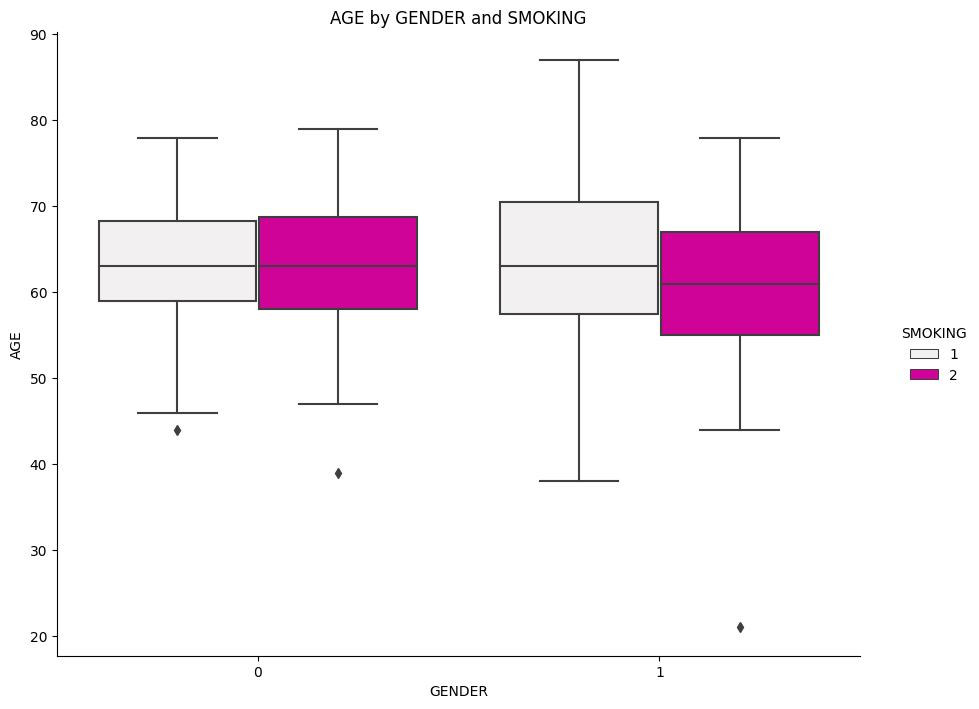

In [ ]:
#smoking no=1, yes=2, gender: Female=1, Male=0
sns.catplot(x = "GENDER",
            y = "AGE",
            kind = "box",
            hue = "SMOKING",
            color = '#D00399',
            data = data, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "AGE by GENDER and SMOKING");
# we conclude from the graph that smoking females are likely older than non-smoking females.

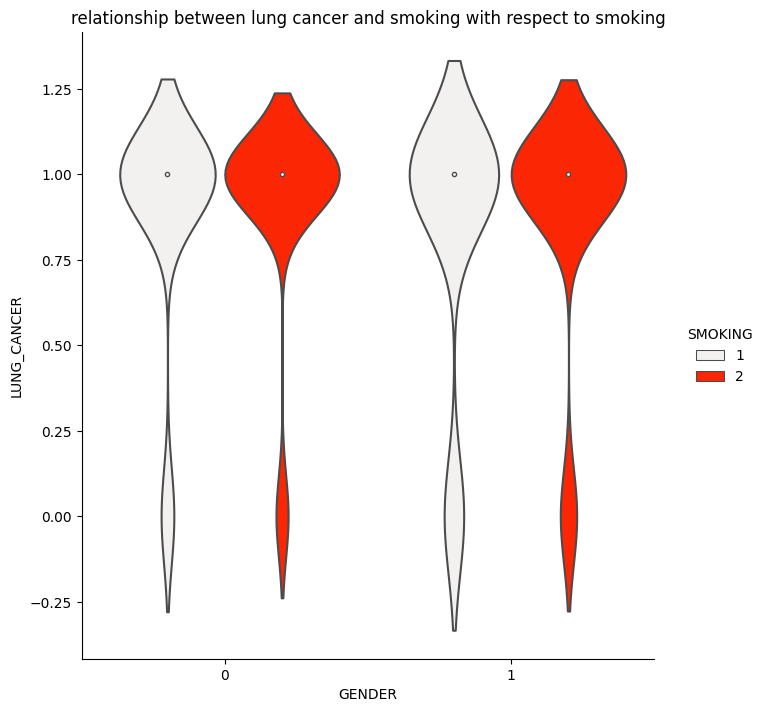

In [ ]:
#smoking no=1, yes=2
sns.catplot(x = "GENDER",
            y = "LUNG_CANCER",
            hue = "SMOKING",
            kind = "violin",
            color = '#FB2604',
            data = data, saturation = 1, height = 7, aspect = 1,
            margin_titles = True).set(title = "relationship between lung cancer and smoking with respect to smoking");

## 2.5 Scatterplot


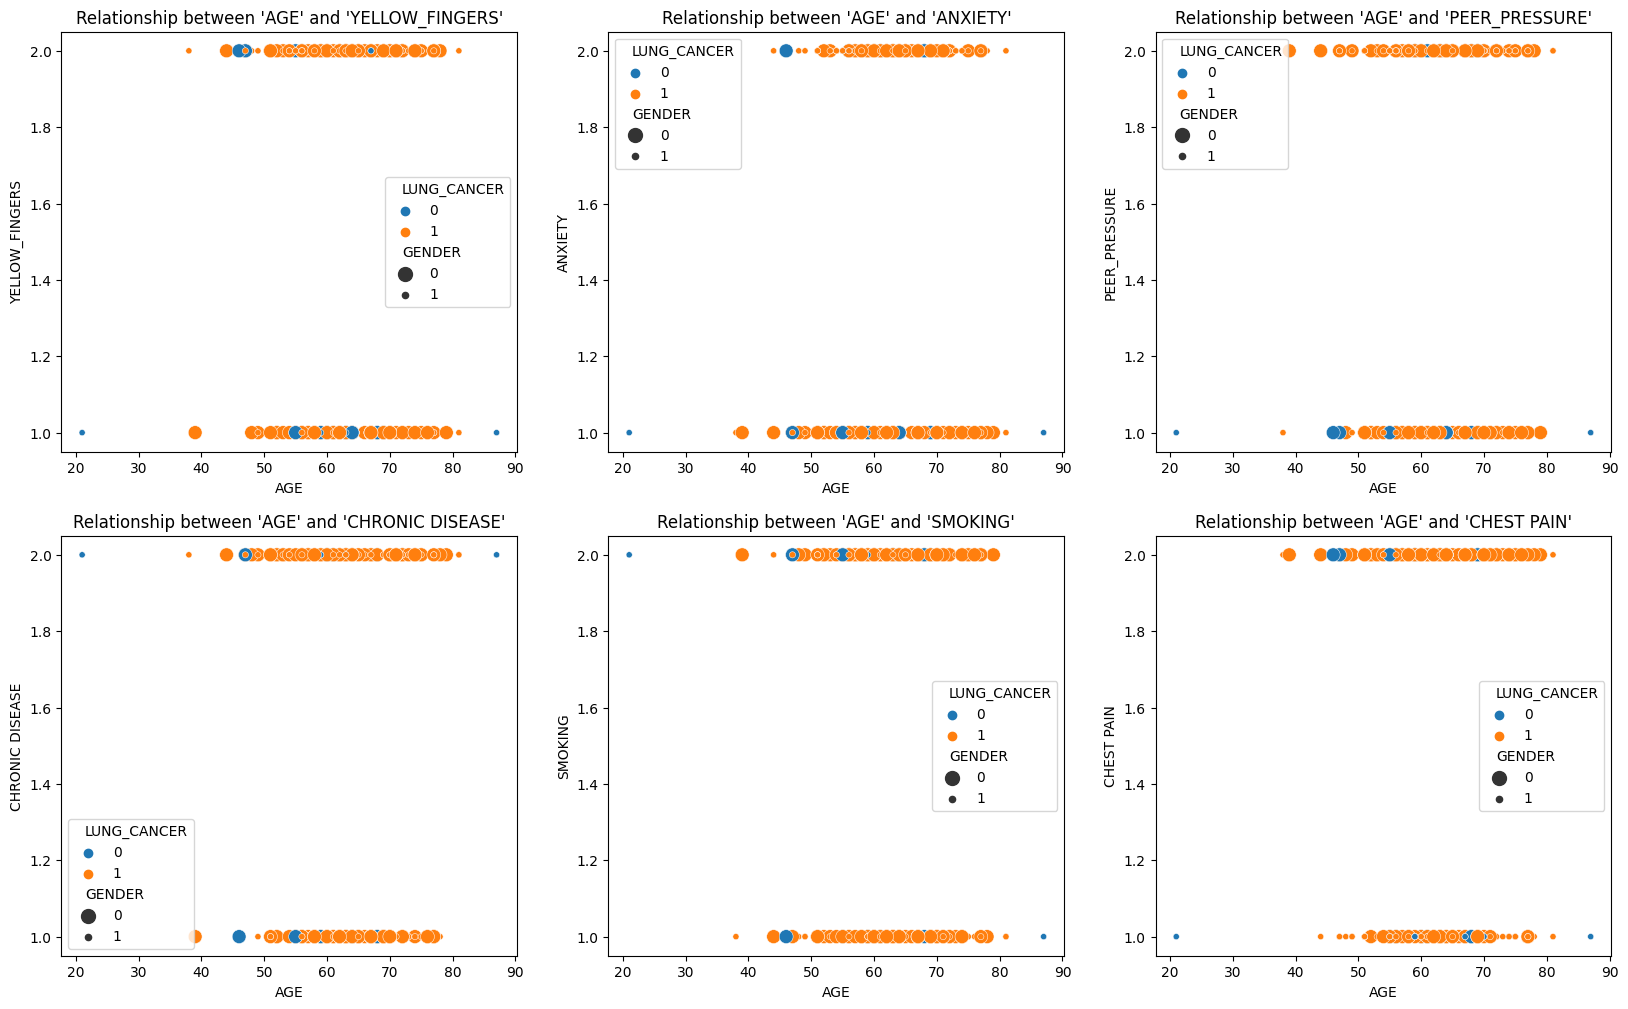

In [ ]:
#Lung_cancer: no:0, yes:1
fig, axes = plt.subplots(2, 3, figsize = (20, 12))
axes = axes.flatten()

#Relationship between lung cancer and age, it also shows if the person has lung cancer 
sns.scatterplot(ax = axes[0], x = "AGE", y = "YELLOW_FINGERS",
                hue = "LUNG_CANCER", size = "GENDER", sizes=(20, 100), legend="full",
                data = data).set(title = "Relationship between 'AGE' and 'YELLOW_FINGERS'");

#Relationship between lung anxiety and age
sns.scatterplot(ax = axes[1], x = "AGE", y = "ANXIETY", hue = "LUNG_CANCER",
                size = "GENDER", sizes=(20, 100), legend="full",
                data = data).set(title = "Relationship between 'AGE' and 'ANXIETY'");

#Relationship between lung peer pressure and age
sns.scatterplot(ax = axes[2], x = "AGE", y = "PEER_PRESSURE", hue = "LUNG_CANCER",
                size = "GENDER", sizes=(20, 100), legend="full",
                data = data).set(title = "Relationship between 'AGE' and 'PEER_PRESSURE'");

#Relationship between lung chronic disease and age
sns.scatterplot(ax = axes[3], x = "AGE", y = "CHRONIC DISEASE", hue = "LUNG_CANCER",
                size = "GENDER", sizes=(20, 100), legend="full",
                data = data).set(title = "Relationship between 'AGE' and 'CHRONIC DISEASE'");

#Relationship between lung smoking and age
sns.scatterplot(ax = axes[4], x = "AGE", y = "SMOKING", hue = "LUNG_CANCER",
                size = "GENDER", sizes=(20, 100), legend="full",
                data = data).set(title = "Relationship between 'AGE' and 'SMOKING'");

#Relationship between lung chest pain and age
sns.scatterplot(ax = axes[5], x = "AGE", y = "CHEST PAIN", hue = "LUNG_CANCER",
                size = "GENDER", sizes=(20, 100), legend="full",
                data = data).set(title = "Relationship between 'AGE' and 'CHEST PAIN'");

## 2.6 Distplot

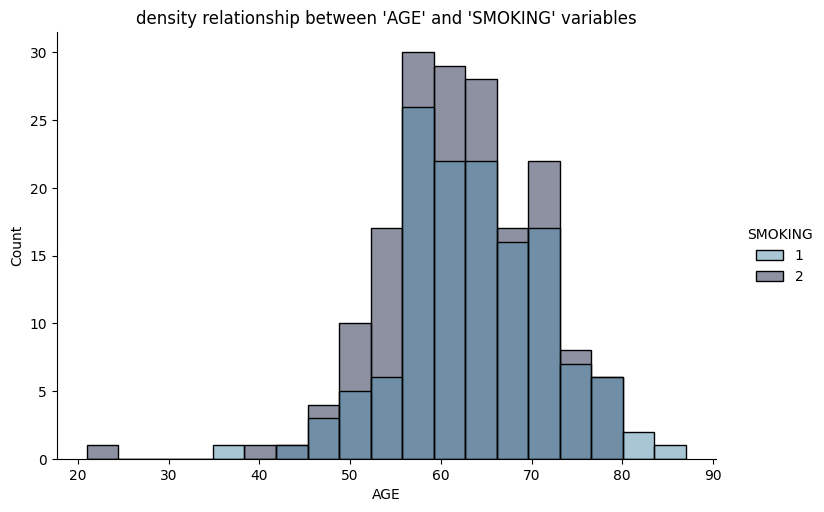

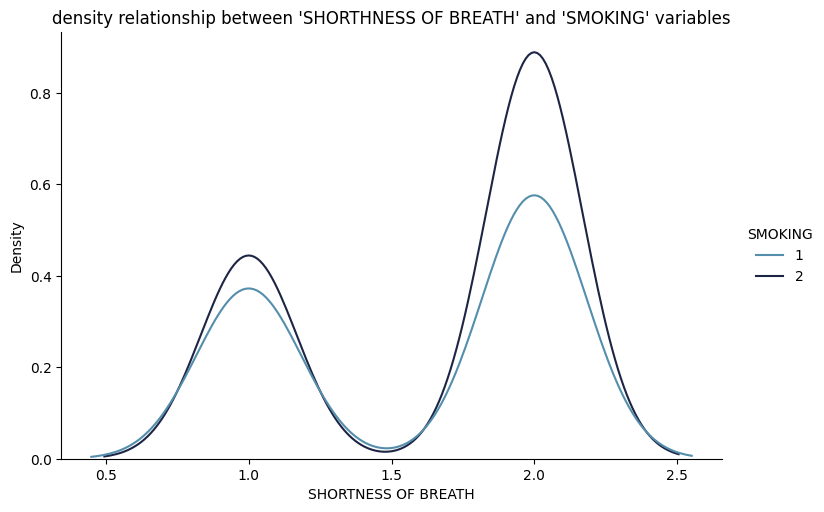

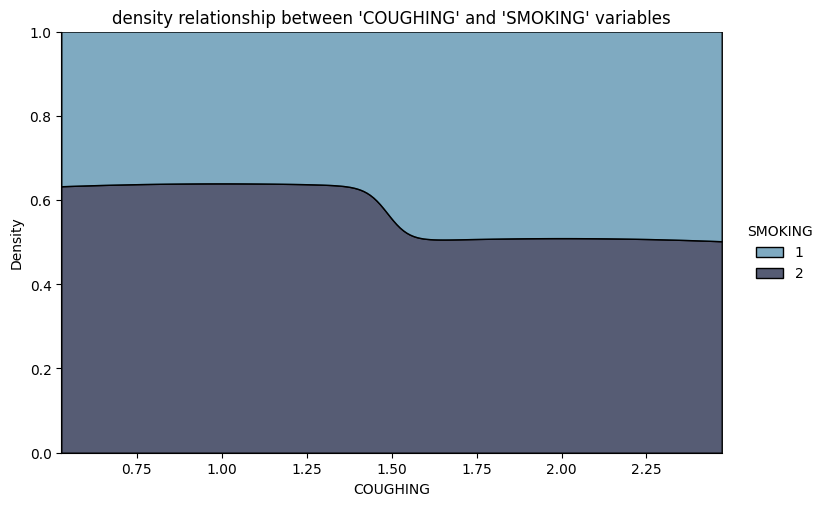

In [ ]:
#relationship of smoking and other variables in the dataset Smoking: YES=2 , NO=1.


#relationship between age and smoking
sns.displot(
    data = data, x = "AGE", hue = "SMOKING",
    kind = "hist", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title =  "density relationship between 'AGE' and 'SMOKING' variables");
#range between 55 and 65, range of smokers and higher than non-smokers, while in 40 years old range, most of the people are smokers


sns.displot(
    data = data, x = "SHORTNESS OF BREATH", hue = "SMOKING",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'SHORTHNESS OF BREATH' and 'SMOKING' variables");
# people who smoke are more likely to have shortness of breath

sns.displot(
    data = data, x = "COUGHING", hue = "SMOKING",
    kind = "kde", height = 5, aspect = 1.5, multiple="fill",
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'COUGHING' and 'SMOKING' variables");
#smoking people are more likely to cough compared to non-smokers    

# 3 | Preprocessing

## 3.1 Split the data into X as train data and y as resulted label


In [ ]:
X=data.drop(['LUNG_CANCER'],axis=1)
y=data['LUNG_CANCER']

## 3.2 Random data shuffle


In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

## 3.3 Split data to train set and test set


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (405, 15)
Test shape: (135, 15)


## 3.4 Encode age to 0 and 1 by average age


In [ ]:
#replacing ages with dummy variables according to the average
for i, age in enumerate(X['AGE']):
    if age < avg:
        X['AGE'][i] = 0 #Equal 0 if age < 62.09
    else: 
        X['AGE'][i] = 1 #Equal 1 if age > 62.09
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,1,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,1,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,0,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,1,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,1,1,2,1,1,1,1,1,2,1,2,2,1,1


# 4 | Model Building

## 4.1 Importing Libraries

In [ ]:
#importing libraries required for the testing

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

## 4.2 Creating Model Training Sets

In [ ]:
model_list = []
result = []

## 4.3 K-neighbors classifier 


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        68
           1       1.00      0.96      0.98        67

    accuracy                           0.98       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135



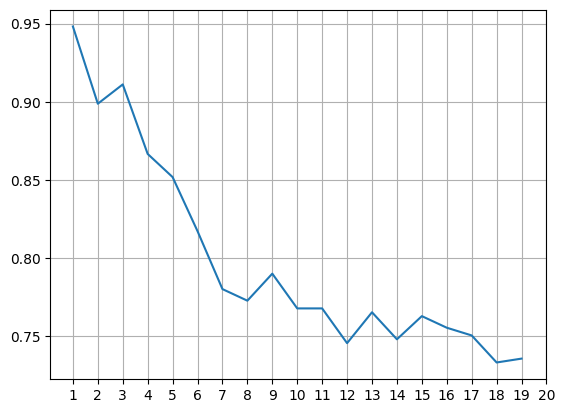

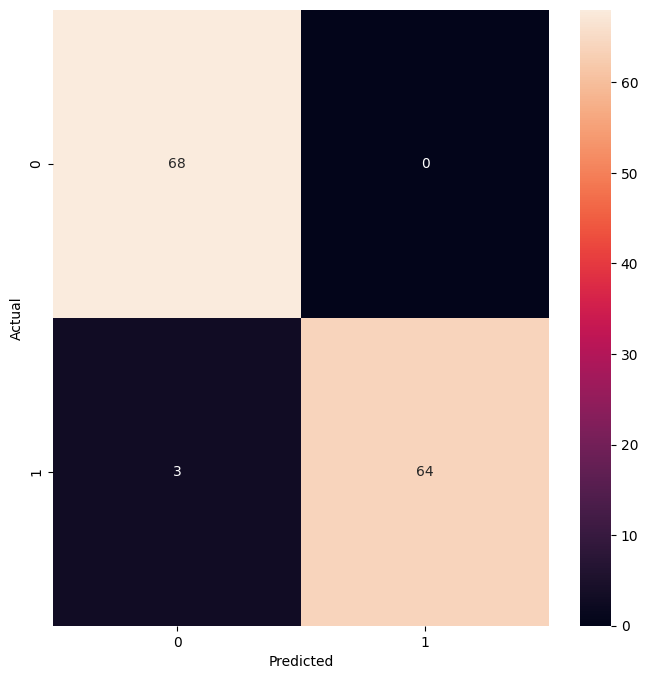

In [ ]:
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,knn.predict(X_test)))
model_list.append("K-neighbor Classifier: ")
result.append(round(accuracy_score(y_test,knn.predict(X_test)) *100, 2))

## 4.4 Support Vector Machine


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      0.99        67

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135


Best Parameters of SVC model is : {'gamma': 100, 'C': 100}



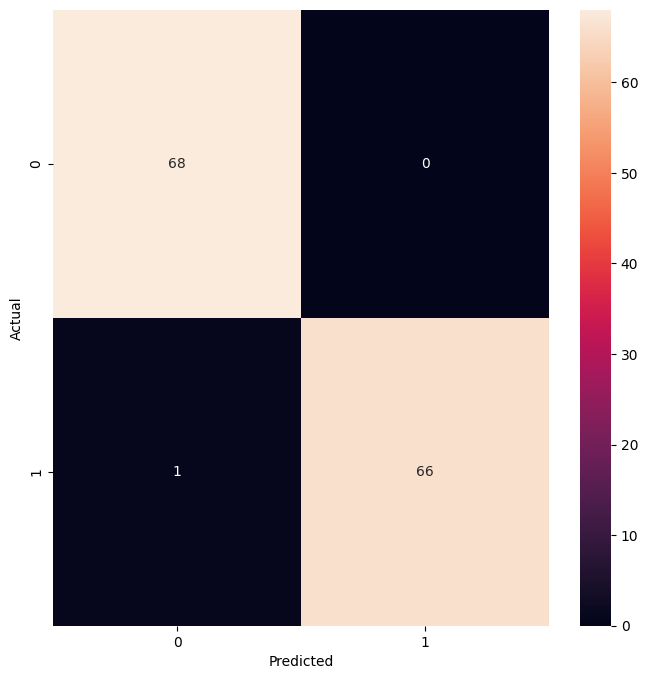

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')
model_list.append("Support Vector Machine: ")
result.append(round(accuracy_score(y_test,y_pred_svc) *100, 2))

## 4.5 Logistic Regression


              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.95      0.90      0.92        67

    accuracy                           0.93       135
   macro avg       0.93      0.93      0.93       135
weighted avg       0.93      0.93      0.93       135



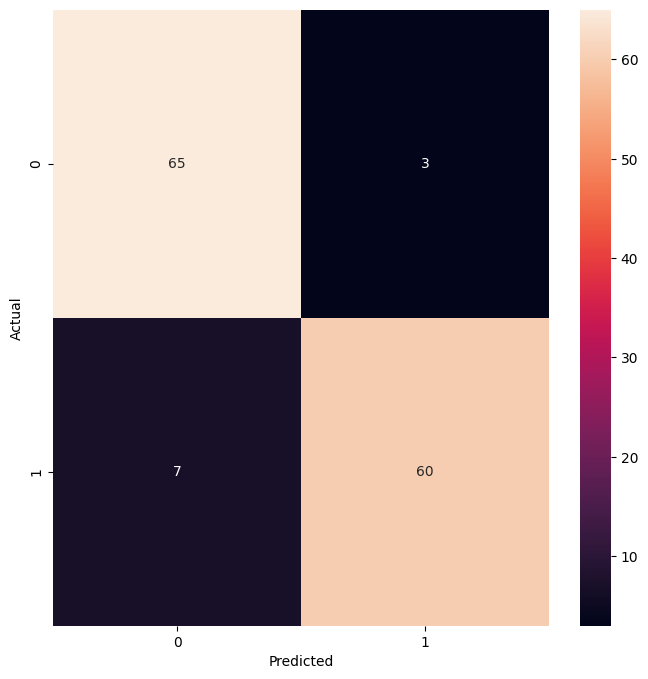

In [ ]:
#using logistic regression to show predicted and actual values of the dataset

param_grid={
    'C':[0.001,0.01,0.1,1,10,100], 
    'max_iter':[50,75,100,200,300,400,500,700]
}
#log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
#log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))
model_list.append("Logistic Regression: ")
result.append(round(accuracy_score(y_test,y_pred_log) *100, 2))

## 4.6 Support Vector Classifier


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      0.99        67

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135



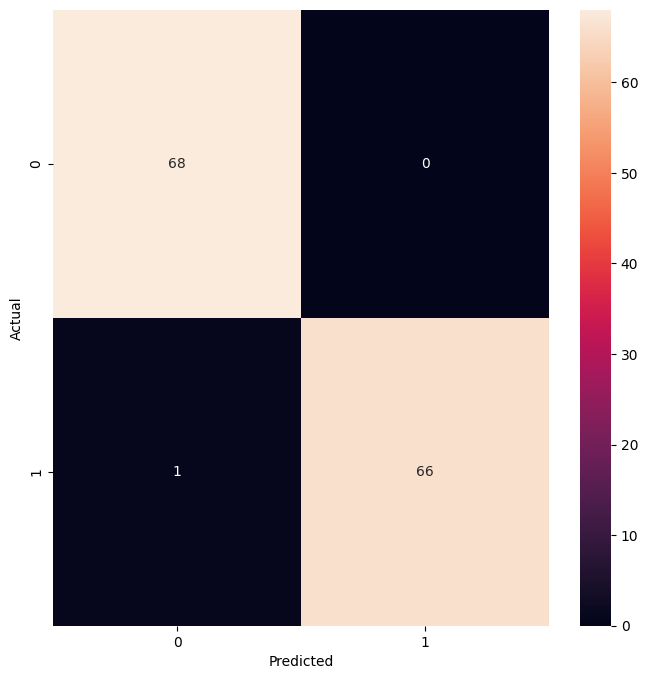

In [ ]:

model = SVC(gamma=10,C=100)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
model_list.append("Support Vector Classifier: ")
result.append(round(accuracy_score(y_test,y_pred_svc) *100, 2))

## 4.7 Random Forest Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        68
           1       1.00      0.91      0.95        67

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135


Best Parameter: {'n_estimators': 50}



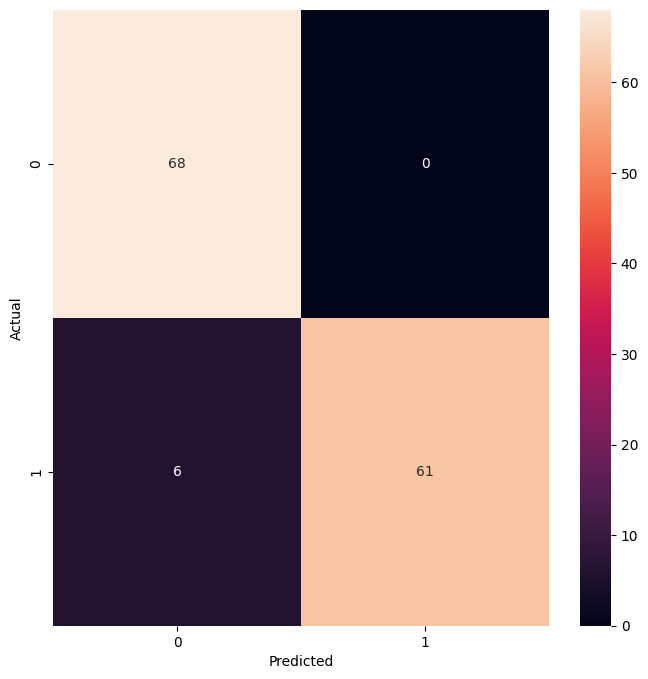

In [ ]:
param_grid = {'n_estimators': [50, 75,100, 150, 200,300],}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')
model_list.append("Random Forest Classifier: ")
result.append(round(accuracy_score(y_test,y_pred_rcv) *100, 2))

# 5 | Result And Conclution

In [ ]:
max = 0
dir = 0
for i, model_name in enumerate(model_list):
    if result[i]> max:
        max = result[i]
        dir = i
    print(model_name, result[i], "%")
model_final = model_list[dir].rstrip(": ")
print("\nConclusion:")
print(f"Choose model {model_final}")
print(f"The best accuracy is {result[i-1]}%")
print(f"The test set has {X_test.shape[0]} patients, choosen randomly from the dataset {X_over.shape[0]} patients")


K-neighbor Classifier:  97.78 %
Support Vector Machine:  99.26 %
Logistic Regression:  92.59 %
Support Vector Classifier:  99.26 %
Random Forest Classifier:  95.56 %

Conclusion:
Choose model Support Vector Machine
The best accuracy is 99.26%
The test set has 135 patients, choosen randomly from the dataset 540 patients
